<a href="https://colab.research.google.com/github/miles-garcia/DSPS_MGarcia/blob/main/PHYS661_HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install umap-learn
!pip install umap-learn[plot]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=57f78d6e6294ce9c3913755fb0ec19899de5ff14c8fbc46275fab07dcc23540c
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=a32acb8b7e609d3a45568c0a598ad1de3d6169d78f545f4900d3fa46d4f6b501
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 69.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import pylab as plt
import scipy as sp
import sklearn as skl
from sklearn import cluster
import umap
import umap.plot
from scipy.cluster.hierarchy import dendrogram, linkage

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)
/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# I  read the data
in https://github.com/fedhere/DSPS_FBianco/tree/master/HW7
its called kidpackgene.csv

In [ ]:
genes = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/HW7/kidpackgenes.csv',index_col=0)

make sure you are not reading the index as a feature! you can control this with the index_col paramter of the function pd.read_csv or remove the column after you read the data in


In [ ]:
genes.head()

,1,2,3,4,5,6,7,8,10,11,...,76,77,78,79,81,83,84,85,86,87
1,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,0.026710,...,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
2,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,0.005533,...,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
3,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,-0.222495,...,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
4,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,0.129876,...,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
5,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,0.116657,...,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477


make sure you show the data and look at it carefully

In [ ]:
genes.shape

(4224, 74)

# II  Explore and preprocess the data  explore the data.


## II a
missing values? (remember you can use the missingno package and visualize the missing values!). What should you do with them?

In [ ]:
genes.isnull().sum().sum()

#no missing values.

0

## II b
whiten it, normalize it, scale it. What is appropriate? discuss your choices

In [ ]:
genes.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '10', '11', '12', '13', '14',
       '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26',
       '27', '28', '29', '30', '31', '33', '34', '35', '36', '37', '38', '39',
       '40', '41', '42', '43', '44', '45', '46', '48', '49', '50', '51', '52',
       '55', '56', '57', '58', '60', '61', '64', '65', '66', '68', '69', '72',
       '73', '74', '75', '76', '77', '78', '79', '81', '83', '84', '85', '86',
       '87'],
      dtype='object')

In [ ]:
scaledgenes = genes.copy()


In [ ]:
len(scaledgenes)

4224

In [ ]:
for col in scaledgenes.columns:
  scaledgenes[col] = (genes[col] - np.mean(genes[col]))/np.std(genes[col])


In [ ]:
scaledgenes.head()

,1,2,3,4,5,6,7,8,10,11,...,76,77,78,79,81,83,84,85,86,87
1,-0.103909,-1.446312,0.541153,-0.308283,0.507069,0.073855,0.180323,0.577397,0.549727,0.125548,...,0.567689,-0.724406,0.067215,-0.613430,0.219231,0.403530,-0.023856,1.132082,0.493203,0.952768
2,-0.739433,0.538795,0.695164,-0.631343,0.204461,0.394636,0.386041,-0.012784,1.164705,0.065613,...,0.838749,-0.966630,-0.339377,-0.585542,0.369915,0.040164,0.512633,0.954949,-0.695082,0.587721
3,0.010247,-0.529571,-0.455381,-0.257028,-0.868660,0.348733,-0.144582,0.063451,0.806135,-0.579737,...,0.037522,-0.993914,-0.082629,-0.353867,0.149310,0.047114,-0.253103,-0.406025,-0.510342,-0.085646
4,-0.464728,-4.951082,0.214578,-0.083851,-0.974459,0.801863,-0.046210,-0.550824,1.493938,0.417520,...,0.387425,-0.218945,-0.292369,-0.695975,2.370657,-0.228020,-2.343784,-0.438132,0.919247,0.170007
5,0.003558,-1.856618,0.236644,-0.774189,0.003864,-0.027839,1.090379,-0.040086,-0.556435,0.380109,...,0.000111,1.084075,0.602728,-0.428047,0.329975,-0.114893,-0.610080,-1.004946,-1.085238,0.167217


In [ ]:

scaledgenes.mean(0).round(2), scaledgenes.std(0) #this seemed to work.

(1     0.0
 2    -0.0
 3     0.0
 4    -0.0
 5    -0.0
      ... 
 83   -0.0
 84    0.0
 85    0.0
 86   -0.0
 87   -0.0
 Length: 74, dtype: float64,
 1     1.000118
 2     1.000118
 3     1.000118
 4     1.000118
 5     1.000118
         ...   
 83    1.000118
 84    1.000118
 85    1.000118
 86    1.000118
 87    1.000118
 Length: 74, dtype: float64)

# III Visualize the data


## III-a calculate and plot a t-SNE rojection of the data on an optimal 2D plane

In [ ]:
skl.manifold.TSNE?


The hyperparameteres perplexity and possibly early_exaggeration may significantly impact the result. Find values that give you some structure in the data. Make sure you read the docstring and info on tSNE!

In [ ]:
#delete
twodproj = skl.manifold.TSNE(n_components = 2, perplexity = 30, early_exaggeration = 20, random_state = 666).fit_transform(scaledgenes)


In [ ]:
twodproj = np.asarray(twodproj)

plot the TSNE 2D projection


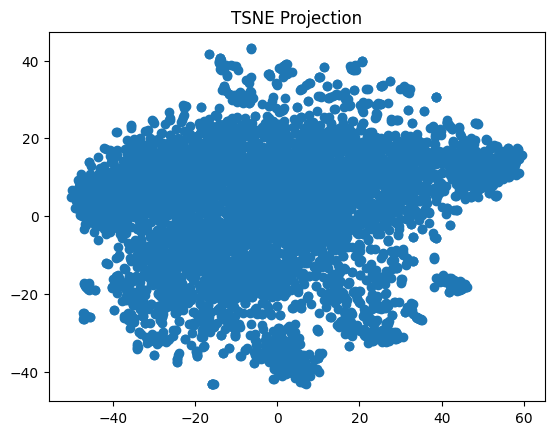

In [ ]:
plt.scatter(np.transpose(twodproj)[0],np.transpose(twodproj)[1])
plt.title("TSNE Projection")
plt.show()

Figure 1: 2-D TSNE Projection of the gene data. I ended up choosing perplexity = 30 (default) and early_exaggeration = 20 because it spaced out the data a bit, giving hints of some structure that might be interesting later on. It is still pretty blobbed in the middle, though, but that was true for pretty much all of the different hyperparameters I gave to the TSNE algorithm.

## III-b calculate and plot the UMAP 2D projection

In [ ]:
umap.UMAP?

In [ ]:
mapper = umap.UMAP(n_components=2,n_neighbors = 20)
umapproj = mapper.fit_transform(scaledgenes)

In [ ]:
umapproj.shape

(4224, 2)

In [ ]:
umapproj = np.asarray(umapproj)

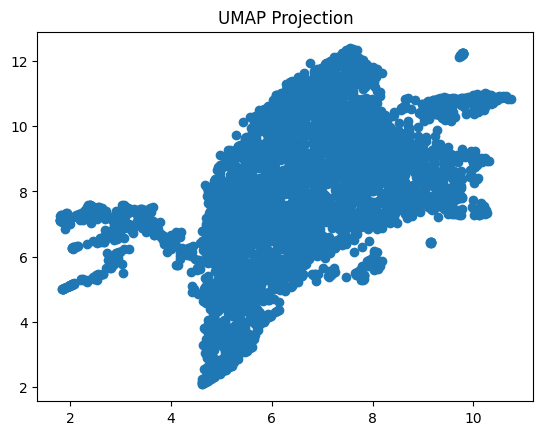

In [ ]:
plt.scatter(np.transpose(umapproj)[0],np.transpose(umapproj)[1])
plt.title("UMAP Projection")
plt.show()

Figure 2: 2-D UMAP projection of the data. I tried a few different values of n_neighbors but there were definitely some interesting things going on here, so I left it at 20. This left-side structure is definitely something that could be interesting later on.

/usr/local/lib/python3.10/dist-packages/umap/plot.py:449: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


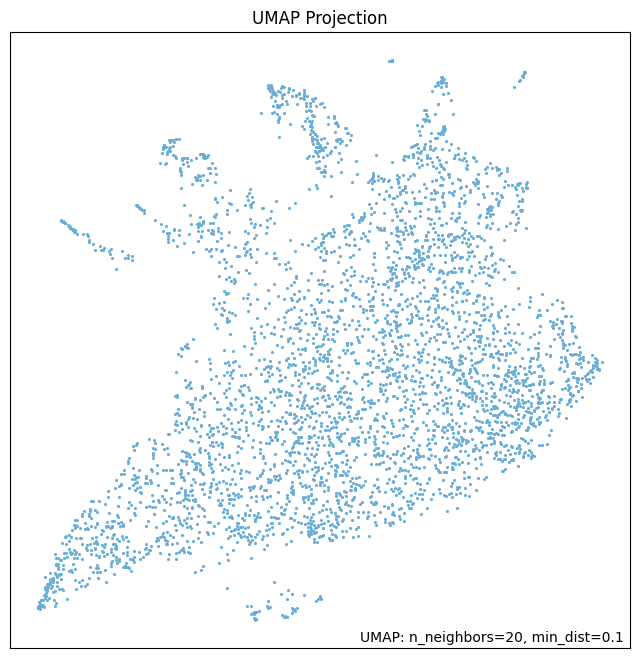

In [ ]:
umap.plot.points(umap.UMAP(n_components=2,n_neighbors = 20).fit(scaledgenes))
plt.title("UMAP Projection")
plt.show()

Figure 3: 2-D UMAP projection using the built in umap plotting command. Doesn't look exactly the same, but without axes I can't really tell what's different. It looks like some features are spaced out more (the top left stuff = the far left stuff on the plot above, but spaced out maybe? And the small group at the bottom of this plot might be visible on the bottom, towards the right, on the plot above)?

# IV K-MEANS Clustering

## IV-a find the best number of culsters for this dataset

create a function that measures the intracluster variance

the intracluster variance is the sum of the variance of each cluster
$V =\sum_J \sum_i{(X_{i\in j} - \bar{X_j})^2}$ for $i$ points in $j$ clusters

In [ ]:
#delete
def calICVar(X, labels):
    """calculates the intracluster variance of the k-MEANS algorithm
    X: the input data (ndarray)
    labels: the labels indicating the cluster of each datapoint: same number of data as X
    """
    icvar = 0
    clusters = np.unique(labels)
    for j in range(len(clusters)):
      points = X[labels == clusters[j]]
      mean = np.mean(points,axis=0)
      for i in range(len(points)):
        ss = np.sum((points[i]-mean)**2)
        icvar += ss

    return icvar


cluster the data with K-Means using 1 to 10 clusters. Calculate the intracluster variance and look for an "elbow" in the value of the intracluster variance as a function of number of clusters/ What is the optimal number of clusters?

In [ ]:
icvs = []
for i in range(10):
  kmeans = skl.cluster.KMeans(n_clusters = i+1,random_state = 666).fit(scaledgenes)
  icv = calICVar(np.asarray(scaledgenes),kmeans.labels_)
  icvs.append(icv)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
icvs

[312576.0000000004,
 246707.89031235263,
 224492.3188061593,
 212931.7291424038,
 203157.39866426185,
 196132.68651318448,
 190777.7468404188,
 187200.11517817303,
 182920.09317593352,
 180001.95806933354]

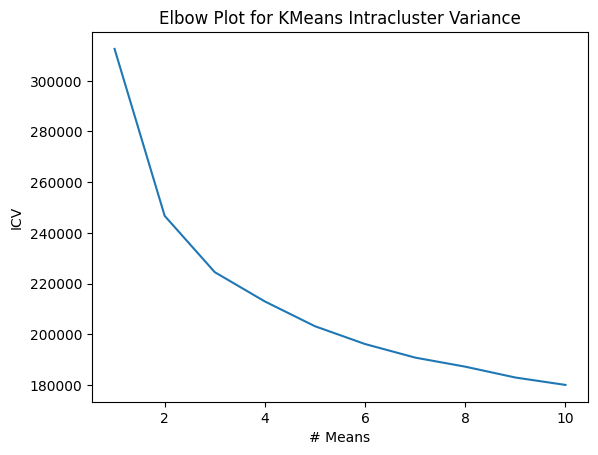

In [ ]:
# elbow plot
plt.plot(np.linspace(1,10,10),icvs)
plt.title("Elbow Plot for KMeans Intracluster Variance")
plt.ylabel("ICV")
plt.xlabel("# Means")
plt.show()

Figure 4: Elbow plot looking at drop in intracluster variance for kMeans as #means increases.

There's a massive drop in ICV from 1 to 2 clusters, and the dropoff is far less significant after 2 clusters, so the elbow plot is suggesting that we take 2 clusters as the "right" # of clusters (although of course that's still not a definitive answer). I could also see 3 clusters because the slope between 2 and 3 is still far steeper than what comes after 3, but I end up using 2 for this exercise.

## IV-b Cluster the data with k-Means into the number of clusters as determined from the elbow

In [ ]:
geneclustersKM = skl.cluster.KMeans(2,random_state = 666).fit(scaledgenes)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## IV-c plot and plot the t-SNY and UMAP projections of the data using the cluster number as color

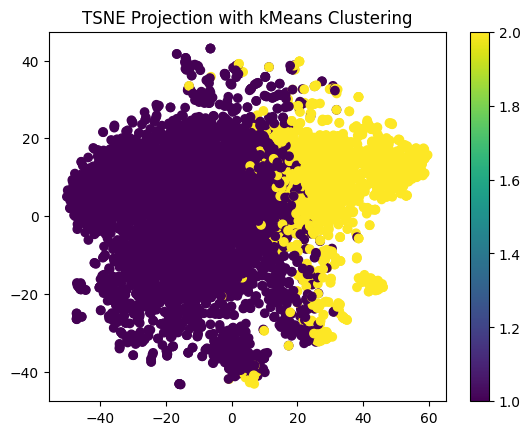

In [ ]:
plt.scatter(np.transpose(twodproj)[0],np.transpose(twodproj)[1],c=geneclustersKM.labels_+1) #TSNE (+1 so that u get cluster "1" and "2")
plt.title("TSNE Projection with kMeans Clustering")
plt.colorbar()
plt.show()

Figure 5: Applying kMeans clustering with 2 clusters to the TSNE projection. It seems like it's just splitting the data along a vertical line (mostly), but it's hard to say what exactly is special here. We don't have clearly separated groups as we might in some cases, so the "reasoning" behind this deliniation is somewhat lost to me.

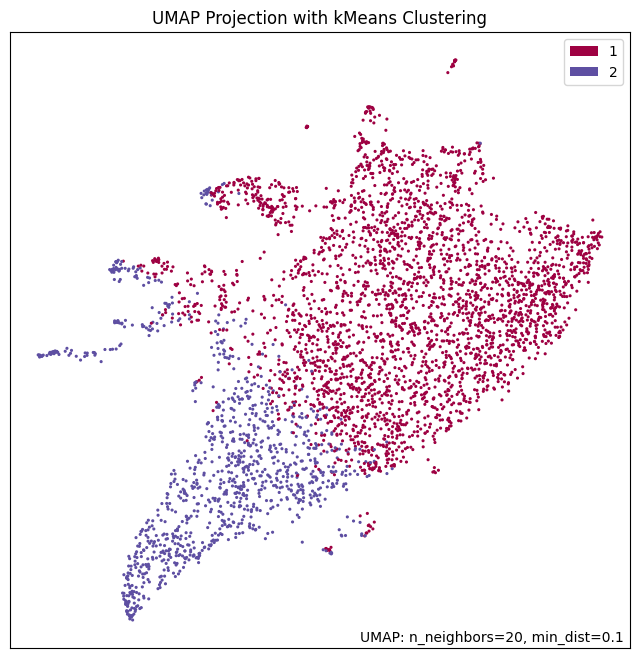

In [ ]:
umap.plot.points(umap.UMAP(n_components=2,n_neighbors = 20).fit(scaledgenes),labels=geneclustersKM.labels_+1)
plt.title("UMAP Projection with kMeans Clustering")
plt.show()

Figure 6: Same as above plot, but mapping onto the UMAP projection, this time. We see a similar thing, however, with a line deliniating cluster 1 from cluster 2. Again, hard to say why. Interesting that for the UMAP, the weird left-side structure, that I said was potentially interesting, doesn't seem to amount to anything in the clustering. It's broken in half to each cluster rather than being its own cluster, for example.

# Use dDSCAN or hierarchical clustering (461 pick either DBSCAN or hierarchical) and redo the clustering. Can you find the same number of clusters?

# V DBSCAN Clustering


## V-a measure the distribution of Euclidean distances

It is important to choose the hyperparamters of DBSCAN wisely. Initialize the _eps_ parameter of DBSCAN based on the mean Euclidean distance. To that end, calculate and plot the Euclidean distance matrix of each point pairs if you have not yet

In [ ]:
dists = sp.spatial.distance.pdist(scaledgenes)

In [ ]:
dists

array([4.53495137, 6.45229079, 8.01171518, ..., 9.03260968, 8.9762348 ,
       9.1764126 ])

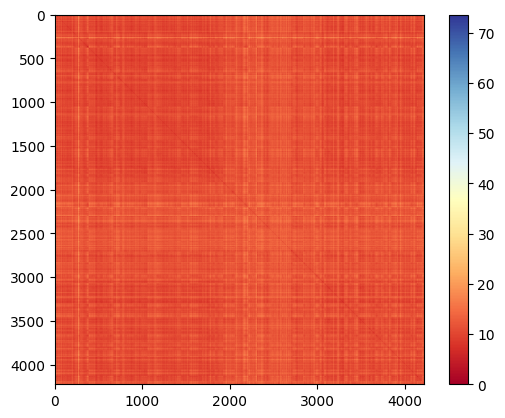

In [ ]:
plt.imshow(sp.spatial.distance.squareform(sp.spatial.distance.pdist(scaledgenes)), cmap="RdYlBu")
plt.colorbar()
plt.show()


Figure 7: This square plot shows the pairwise distances between every point in the data. Since 70 is on the colorbar, I assume there must be at least one distance at that value, but it's not visible so it must be a small part of the data. Most datapoints must lie in the 0-30 range.

 make a histogram of the pairwise distances. You should choose a value to initialize dbscan that is below the mean

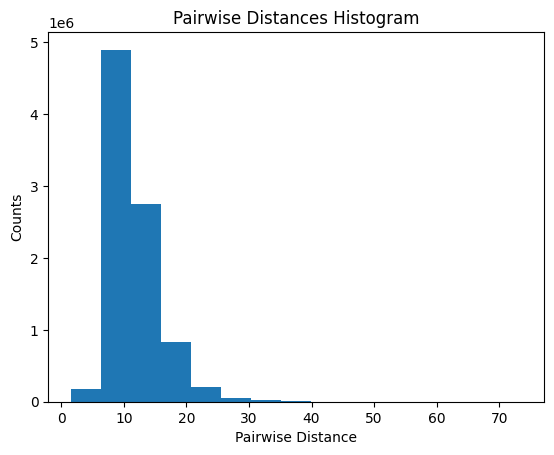

In [ ]:
plt.hist(dists,bins = 15)
plt.title("Pairwise Distances Histogram")
plt.ylabel("Counts")
plt.xlabel("Pairwise Distance")
plt.show()

Figure 8: Histogram showing pairwise distances of points. This agrees with what I saw in the square plot-- most of the data is in that 0-30 range, with the stuff near 70 so small it doesn't even show up on the plot.

In [ ]:
np.mean(dists) #that fits with this hist

11.470978212545768

## V-b Rub DBSCAN

initialize the dbscan _eps_ hyperparameter value appropriately and fit a dbscan model to the data plot the 2D TSNE projection colorcoded as before. How many clusters do you have, how many outliers? is that a significant number?

In [ ]:
skl.cluster.DBSCAN?

In [ ]:
geneclustersDBS = skl.cluster.DBSCAN(eps = 7).fit(scaledgenes) #7 seems appropriate, it's smaller than the mean

np.unique(geneclustersDBS.labels_)

array([-1,  0,  1])

2 clusters + outliers! So same as the kMeans I chose based on the elbow plot.

In [ ]:
outliers = scaledgenes[geneclustersDBS.labels_ == -1]
print("Total number of outliers: %i, Total number of points: %i, Fraction of outliers: %.3f"%(len(outliers),len(scaledgenes),len(outliers)/len(scaledgenes)))

Total number of outliers: 443, Total number of points: 4224, Fraction of outliers: 0.105


10% outliers is not insignificant, but pretty small.

In [ ]:
geneclustersDBS = skl.cluster.DBSCAN(eps = 9).fit(scaledgenes) #I'll also try it with 9 cuz thats a bit bigger

np.unique(geneclustersDBS.labels_)

array([-1,  0,  1])

Trying with an eps slightly closer to the mean pairwise distance.

In [ ]:
outliers = scaledgenes[geneclustersDBS.labels_ == -1]
print("Total number of outliers: %i, Total number of points: %i, Fraction of outliers: %.3f"%(len(outliers),len(scaledgenes),len(outliers)/len(scaledgenes)))

Total number of outliers: 76, Total number of points: 4224, Fraction of outliers: 0.018


Increasing the epsilon parameter by 2 units decreases # outliers by an order of magnitude essentially.

## V-c plot the data in the t-SNE and UMAP projections color-coded by DBSCAN cluster

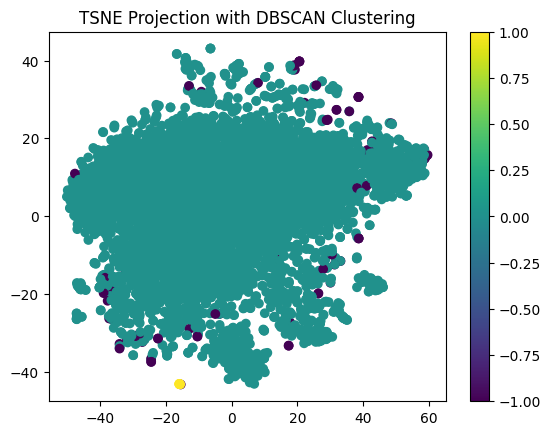

In [ ]:
plt.scatter(np.transpose(twodproj)[0],np.transpose(twodproj)[1],c=geneclustersDBS.labels_)
plt.title("TSNE Projection with DBSCAN Clustering")
plt.colorbar()
plt.show()

Figure 9: DBSCAN clustering placed on the TSNE 2-D projection. We see one cluster (c=1 at the bottom) that's really tiny (it contains like 6 points, barely enough to be a cluster since my minimum is 5). The interesting thing here is that the "outlier" points are just inside cluster 0, so something in the TSNE projection is not showing through about those points compared to the DBSCAN. We also get very different clustering to kMeans.

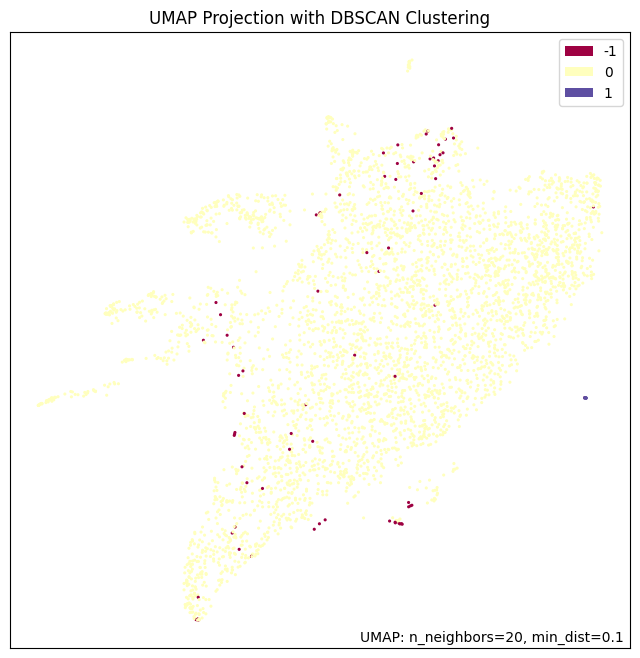

In [ ]:
umap.plot.points(umap.UMAP(n_components=2,n_neighbors = 20).fit(scaledgenes),labels=geneclustersDBS.labels_)
plt.title("UMAP Projection with DBSCAN Clustering")
plt.show()

Figure 10: DBSCAN clustering on the UMAP projection. Once again, we see that tiny cluster on the right, with the outliers on top of the main cluster. Very similar to the TSNE.

In both of these, one cluster is really tiny, but just passes as a cluster, and then the other cluster is just everything else. The "outliers" are still in general pretty much in the same region as the big cluster.

# VI Agglomerative clustering


## VI-a run agglomerative clustering with standard distance choices: ward linkage and Euclidean distance

In [ ]:
skl.cluster.AgglomerativeClustering?

In [ ]:
clusteringAg = skl.cluster.AgglomerativeClustering(n_clusters = 1).fit(scaledgenes)

choose ward linkage and plot the dendrogram of the clusters

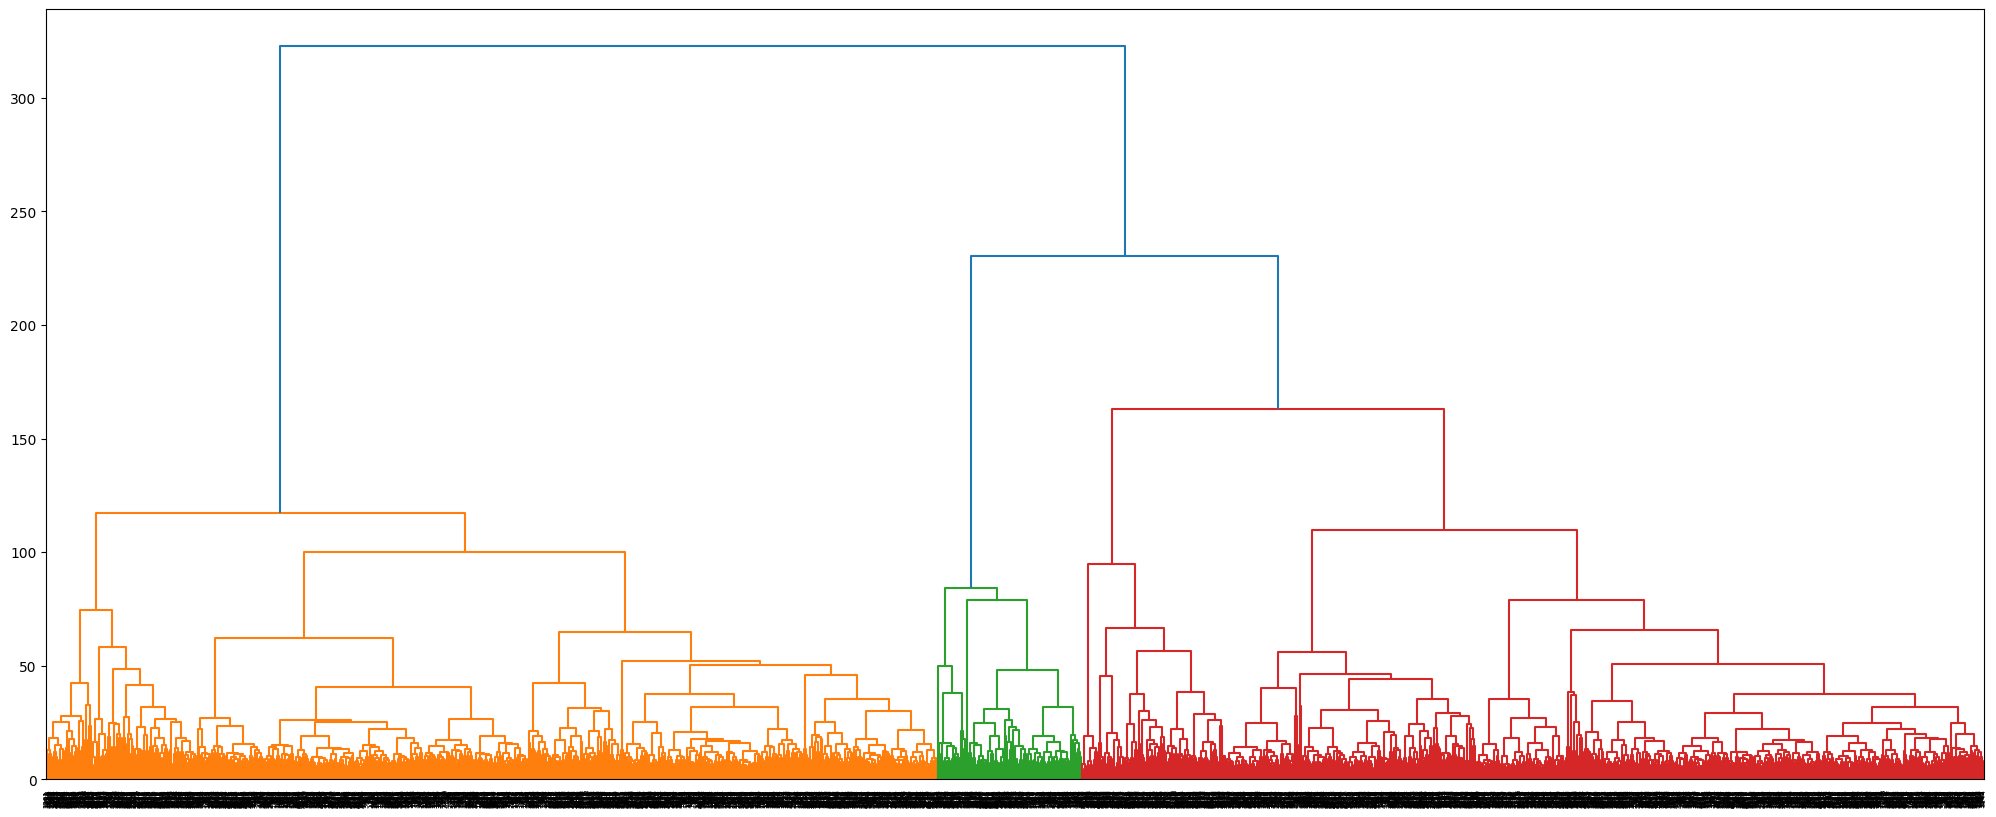

In [ ]:
Z = linkage(scaledgenes, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

Figure 11: Agglomerative clustering with the ward linkage. We see that there are a few clusters at the start of relatively (order of magnitude) equal size. I'd say that this matches more what we saw with kMeans, because we end up with two larger clusters, rather than in DBSCAN, where we had one tiny cluster and one massive cluster.

repeat with a different linkage and comment on differences

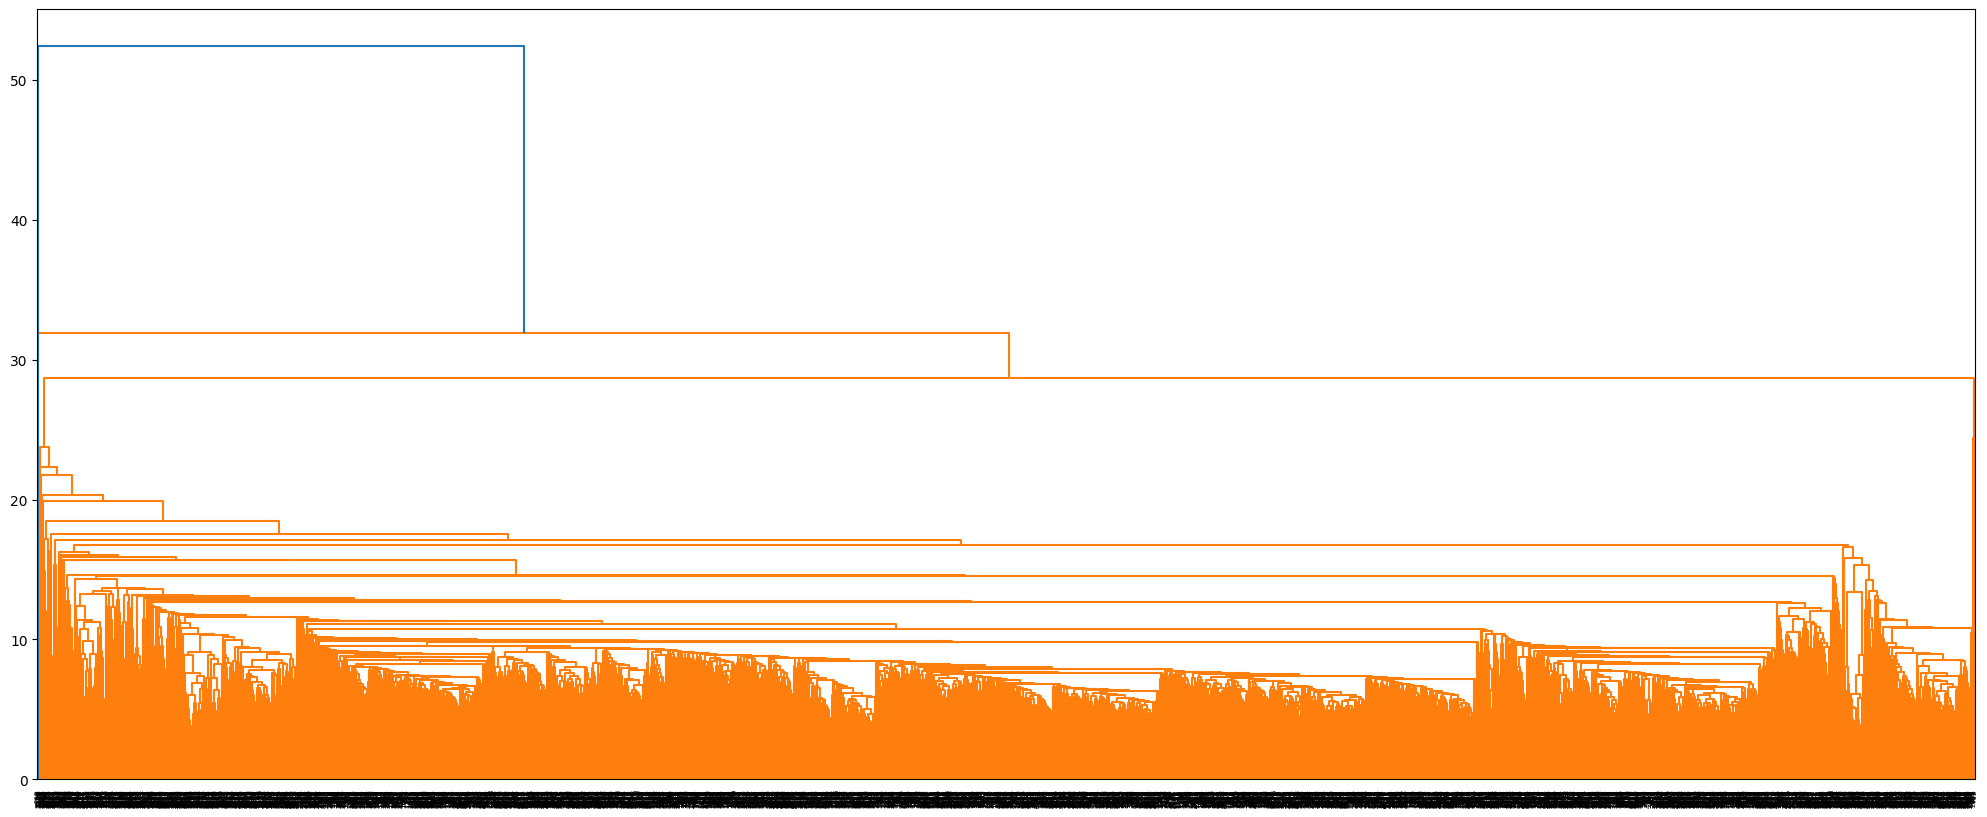

In [ ]:
Z2 = linkage(scaledgenes, 'average')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z2)

Figure 12: Agglomerative clustering with the "average" linkage. I think average corresponds really well to the clusters from DBSCAN, because we have one really tiny cluster (the blue, on the left) that doesn't get added into the rest of the clusters (the orange ones that are combining for most of the levels) until the very end, with a massive distance jump. So that actually matches quite well with what we saw in DBSCAN, unlike the ward linkage, which matched up more with kMeans.

# VI-b rerun agglomerative cluatering to get the "ideal" number of clusters as decided by k-means.



In [ ]:
geneclustersAg = skl.cluster.AgglomerativeClustering(n_clusters=2).fit(scaledgenes)

In [ ]:
geneclustersAg.labels_

array([0, 0, 0, ..., 1, 0, 0])

## VI-c plot the 2D TSNE projection colorcoded as before

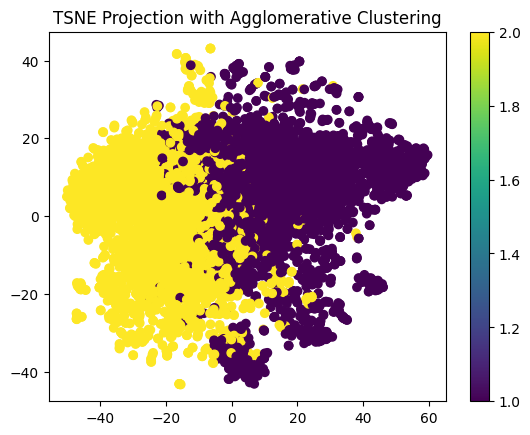

In [ ]:
plt.scatter(np.transpose(twodproj)[0],np.transpose(twodproj)[1],c=geneclustersAg.labels_+1)
plt.title("TSNE Projection with Agglomerative Clustering")
plt.colorbar()
plt.show()

Figure 13: TSNE Projection with cluster mapping from the agglomerative clustering method for 2 clusters. I think this looks more similar to kMeans than DBSCAN, since it has two big clusters, but here, the clusters are more evenly split than with kMeans. Again, not much structure, there's just a vertical line which divides the clusters for the most part (although not entirely).

# VII Comment, in the spirit of https://www.ncbi.nlm.nih.gov/pmc/articles/PMC187526, which was the most "useful" method for clustering

This is a tough question. I want to say kMeans, because it divided the data more "usefully" (Potentially! It's hard to say...) than DBSCAN. DBSCAN just tells me there's one giant cluster and one tiny cluster. This might be useful, but it's hard to tell what makes that tiny cluster relevant, and a change in eps will remove it and tell you you just have one big cluster which doesn't say much. The outliers are a nice thing to have, though, but when we look at them on the TSNE or UMAP projections, the outliers lie right inside one of the clusters, which is certainly interesting. I guess that the projection is not giving us the same information about how those points are outliers compared to what DBSCAN thinks.

KMeans (and I guess the agglomerative clustering, too) gives you two clusters to work with (or more if you want) that you could investigate to try and parse why they're separated where they are. That seems like a useful result for the clustering to give you something more to try and understand in the dataset.